## MultiViewAtlas - Query mapping with scArches demo

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os,sys
import mudata
import anndata
import scanpy as sc
import pandas as pd
import numpy as np

import multi_view_atlas as mva

## Load fetal-immune dataset

In [3]:
datadir = '/nfs/team205/ed6/data/Fetal_immune/cellxgene_h5ad_files/scRNA_data/'
h5ad_files = [f for f in os.listdir(datadir) if f.endswith('embedding.h5ad')]

## Define the hierarchy between views 
view_hierarchy = {'full':{
 'HSC_IMMUNE':{
        'HSC_PROGENITORS':None,
        'LYMPHOID':{
            'NKT':None
        },
        'MYELOID_V2':None,
        'MEM_PROGENITORS':None
    },
    'STROMA':None   
    }
}

# Load full atlas 
adata_full = sc.read_h5ad(os.path.join(datadir, 'PAN.A01.v01.raw_count.20210429.PFI.embedding.h5ad'), backed=True)

In [5]:
# Load each view
adata_dict = {}
adata_dict['full'] = adata_full
for v in mva.utils.get_views_from_structure(view_hierarchy):
    if v != 'full':
        vdata = sc.read_h5ad(os.path.join(datadir, f'PAN.A01.v01.raw_count.20210429.{v}.embedding.h5ad'), backed=True)
        adata_dict[v] = vdata

## Make MultiViewAtlas object

In [6]:
# Initialize from mudata object
mdata = mudata.MuData(adata_dict)
mdata.obs = mdata['full'].obs.copy() # otherwise obs cols are named full:colname 
mdata['full'].uns['view_hierarchy'] = view_hierarchy.copy()
mvatlas = mva.tl.MultiViewAtlas(mdata, transition_rule='X_scvi')

In [9]:
mvatlas

MultiViewAtlas object with view hierarchy:
	full:
	  HSC_IMMUNE:
	    HSC_PROGENITORS: null
	    LYMPHOID:
	      NKT: null
	    MEM_PROGENITORS: null
	    MYELOID_V2: null
	  STROMA: null
	
MuData object with n_obs × n_vars = 911873 × 268304
  obs:	'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'old_annotation_uniform', 'organ', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Sample', 'scvi_clusters', 'is_maternal_contaminant', 'anno_lvl_2_final_clean', 'celltype_annotation'
  obsm:	'view_assign'
  8 modalities
    full:	911873 x 33538
      obs:	'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'old_annotation_uniform', 'organ', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Sample', 'scvi_clusters', 'is_maternal_contaminant', 'anno_lvl_2_final_clean', 'celltype_annotation'
      var:	'GeneID', 'GeneName', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'scvi_model_var'
      uns:	'leiden', 'scvi', 'umap', 'view_h

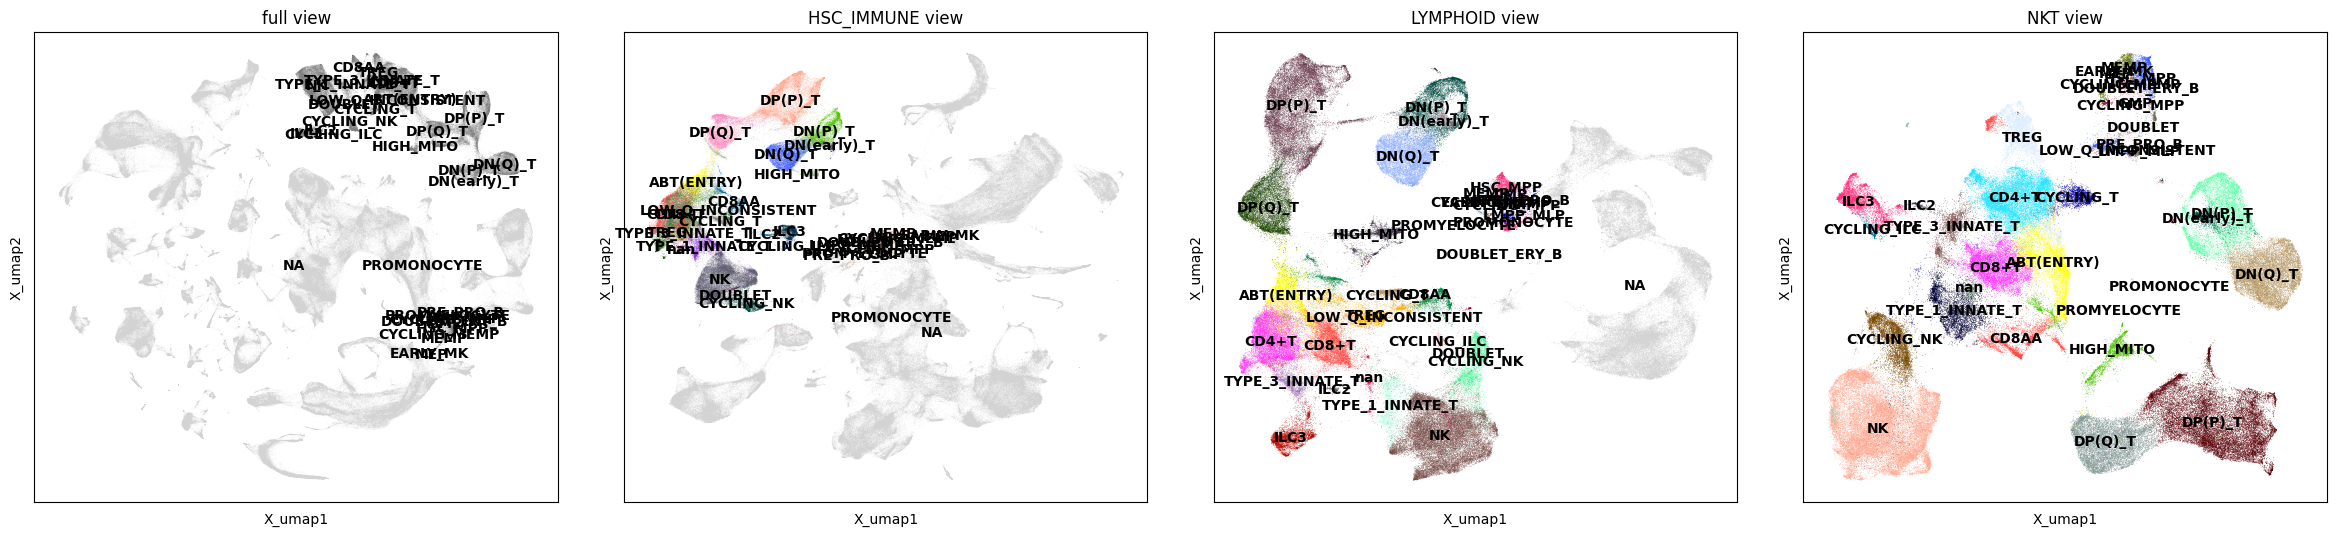

In [10]:
mva.pl.multiview_embedding(mvatlas.mdata, view='NKT', color='anno_lvl_2_final_clean')

## Load query dataset

In [11]:
h5ad_query = '/nfs/team205/ed6/data/Fetal_immune/panimmune_full_LYMPHOID_query.h5ad'
adata_query = sc.read_h5ad(h5ad_query)

In [15]:
adata_query

AnnData object with n_obs × n_vars = 264929 × 31915
    obs: 'organ_code', 'donor', 'method', 'Category'
    var: 'GeneID', 'GeneName'
    obsm: 'X_umap'

MultiViewAtlas object with view hierarchy:
	full:
	  HSC_IMMUNE:
	    HSC_PROGENITORS: null
	    LYMPHOID:
	      NKT: null
	    MEM_PROGENITORS: null
	    MYELOID_V2: null
	  STROMA: null
	
MuData object with n_obs × n_vars = 911873 × 268304
  obs:	'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'old_annotation_uniform', 'organ', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Sample', 'scvi_clusters', 'is_maternal_contaminant', 'anno_lvl_2_final_clean', 'celltype_annotation'
  obsm:	'view_assign'
  8 modalities
    full:	911873 x 33538
      obs:	'n_counts', 'n_genes', 'file', 'mito', 'doublet_scores', 'predicted_doublets', 'old_annotation_uniform', 'organ', 'Sort_id', 'age', 'method', 'donor', 'sex', 'Sample', 'scvi_clusters', 'is_maternal_contaminant', 'anno_lvl_2_final_clean', 'celltype_annotation', 'view_color'
      var:	'GeneID', 'GeneName', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'scvi_model_var'
      uns:	'leiden', 'scvi', '